# Partie II - Les effets des caractéristiques des prêts sur leurs montants.
## par ***Christ Peryclais NGOLO***

## Apperçu de l'enquête

*Dans cette enquête, j'ai voulu voir les caractéristiques des prêts sur les montants de ces derniers. L'objectif principal était focaliser sur les types d'emploi et les durées de prêts.*



## Apperçu de l'ensemble de données

*Dans cette ensemble de données nous avons 113937 prêts avec 81 variables sur chque prêts. L'objectif ici n'était pas d'explorer toutes ces 81 variables, mais plutôt quelques unes d'entre elles.*

In [1]:
# Importer toutes les librairies et définir les figure à intégrer en ligne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Supprimer les avertissements de la sorie finale
import warnings
warnings.simplefilter("ignore")

In [2]:
# Charger le dataset dans un tableau Pandas
loan = pd.read_csv("prosperLoanData.csv")

## Distribution des Montants de Prêts

> Le montants de prêts dans cet ensemble de donnés prennent un intervalle assez large, qui va entre ***`1000 $`*** et approximativement ***`29000 $`*** 

In [3]:
# Définir la fonction
def plot_hist(df, x, cases):
    # Traçage de la figure
    plt.hist(data = df, x = x, bins = cases)

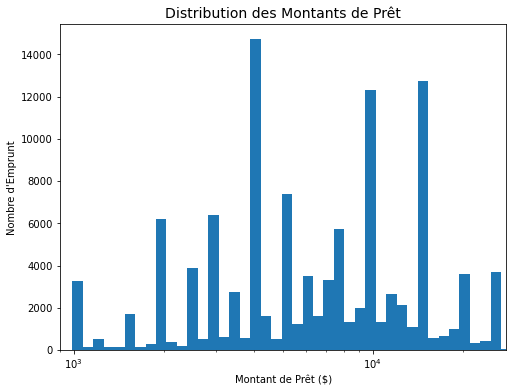

In [4]:
# Taille des cases  0.0175
log_binsize = 0.035
bins = 10 ** np.arange(2.4, np.log10(loan["LoanOriginalAmount"].max())+log_binsize, log_binsize)

# Dimensionner l'espace de travail
plt.figure(figsize=[8, 6])
# Visualisition en faisant appel à la fonction
plot_hist(loan, "LoanOriginalAmount", bins)
# Appliquer la fonction log à l'étiquette de l'axe des x
plt.xscale('log')
# Titre de la figure
plt.title("Distribution des Montants de Prêt", fontsize = 14)
# Labeliser l'axe des x
plt.xlabel('Montant de Prêt ($)')
# Labeliser l'axe des y
plt.ylabel("Nombre d'Emprunt")
# Limiter les valeurs
plt.xlim(900, 28e3);

## Statut d'emploi et le statut de prêt selon la catégorie de crédit

> Il y a une interaction entre le statut (type) d'emploi, le statut de prêt et la catégorie credit accordée. Plus le montant de prêt est assez conséquent, plus il est accordé aux emprunteurs ayant les statuts ***`Employed`*** et ***`Self-employed`***, et de même pour les catégories de crédit. Plus les emprunteurs travaillent à temps partiel ***`Part-time`***, moins est le montant ***`LoanOriginalAmount`*** qui leur est accordé.

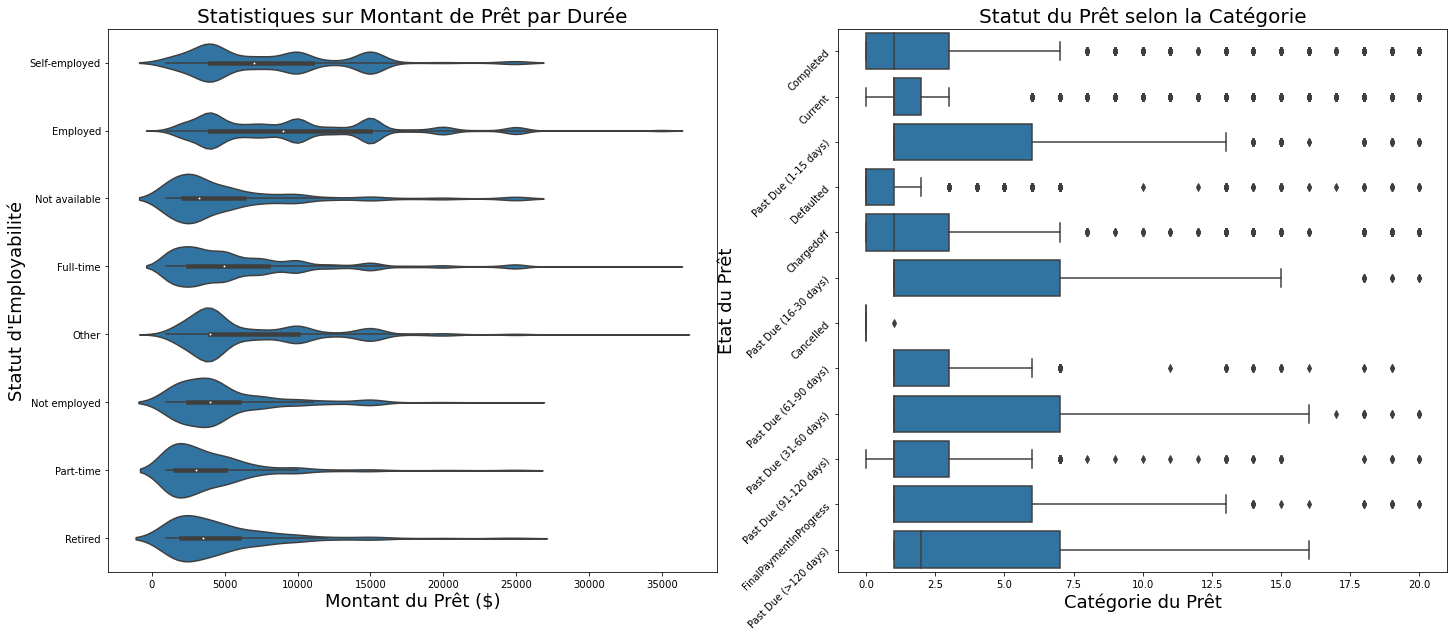

In [5]:
# Choix de la couleur unique à appliquer
color = sns.color_palette()[0]

# Dimensionner l'espace de travail
plt.figure(figsize=(24, 10))

plt.subplot(1, 2, 1)
sns.violinplot(x = "LoanOriginalAmount", y = "EmploymentStatus", 
               data = loan, color = color)
# Titre de la figure
plt.title("Statistiques sur Montant de Prêt par Durée", fontsize = 20)
# Labeliser les axes
plt.xlabel("Montant du Prêt ($)", fontsize = 18)
plt.ylabel("Statut d'Employabilité", fontsize = 18)

plt.subplot(1, 2, 2)
sns.boxplot(x = "ListingCategory (numeric)", y = "LoanStatus", 
               data = loan, color = color)
# Titre de la figure
plt.title("Statut du Prêt selon la Catégorie", fontsize = 20)
# Etiquetter l'axe des x
plt.xlabel("Catégorie du Prêt", fontsize = 18)
# Etiquetter l'axe des y
plt.ylabel("Etat du Prêt", fontsize = 18)
# Pivoter les étiquettes de l'axe y
plt.yticks(rotation = 45);

## Types d'emploi ayant plus de prêt selon les côtes de crédit

> La majorité des prêts ici, sont accordés aux emprunteurs qui travaillent à plein temps ***`Full-time`*** et l'on remarque également que les ***`côtes de crédit`*** de ces emprunteurs sont meilleurs que celles de tous les autres. 

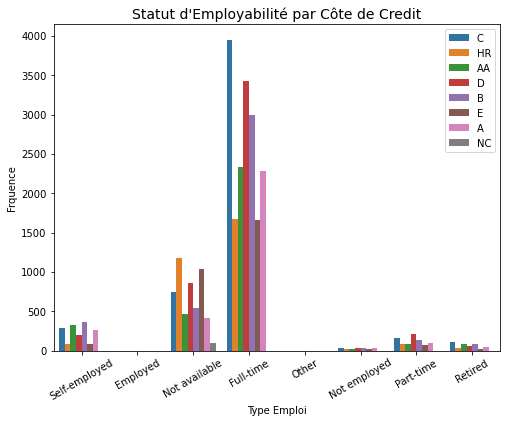

In [6]:
# Dimensionner l'espace de travail
plt.figure(figsize=(8, 6))
sns.countplot(x = "EmploymentStatus", data = loan, hue = "CreditGrade")
# Mettre la légende en haut tout à droite
plt.legend(loc = "upper right")
# Titrer la figure
plt.title("Statut d'Employabilité par Côte de Credit", fontsize = 14)
# Labeliser les axes
plt.ylabel("Frquence")
plt.xlabel("Type Emploi")
# Pivoter les étiquettes de l'axe x à 30°
plt.xticks(rotation = 30);

## Relation entre différentes variables numériques
> Nous pouvons observer une forte correlation entre les ***`Catégories d'annonces`*** et les autres variables mais surtout avec le *taux annuel d'emprunt global* qui est ***`BorrowerAPR`*** ensuite une correlation un peu forte entre la durée d'emprunt ***`Term`*** et le taux d'intérêt de l'emprunteur ***`BorrowerRate`*** et entre le nombre d'investisseurs ***`Investors`*** et toutes les autres variables. Et en ce qui concerne les autres, la corrélation n'est pas conséquente.

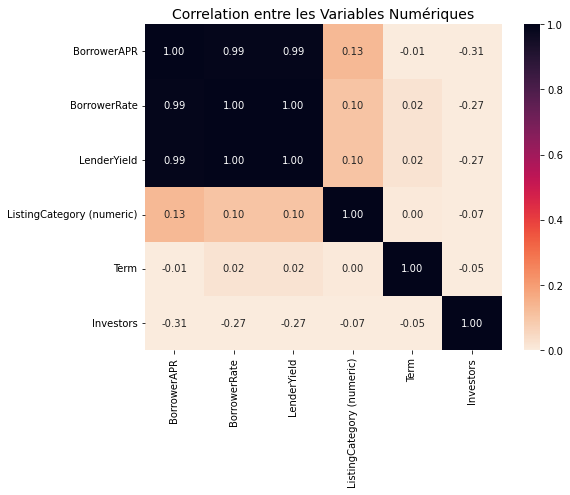

In [7]:
# Créer une liste avec quelques colonnes numériques de notre ensemble de données
loan_stats = ["BorrowerAPR", "BorrowerRate", "LenderYield", 
              "ListingCategory (numeric)", "Term", "Investors"]

#Dimensionner l'espace de travail
plt.figure(figsize=(8, 6))
sns.heatmap(loan[loan_stats].corr(), cmap = "rocket_r", annot = True, fmt = ".2f", vmin = 0)
# Titrer la figure
plt.title("Correlation entre les Variables Numériques", fontsize=14);